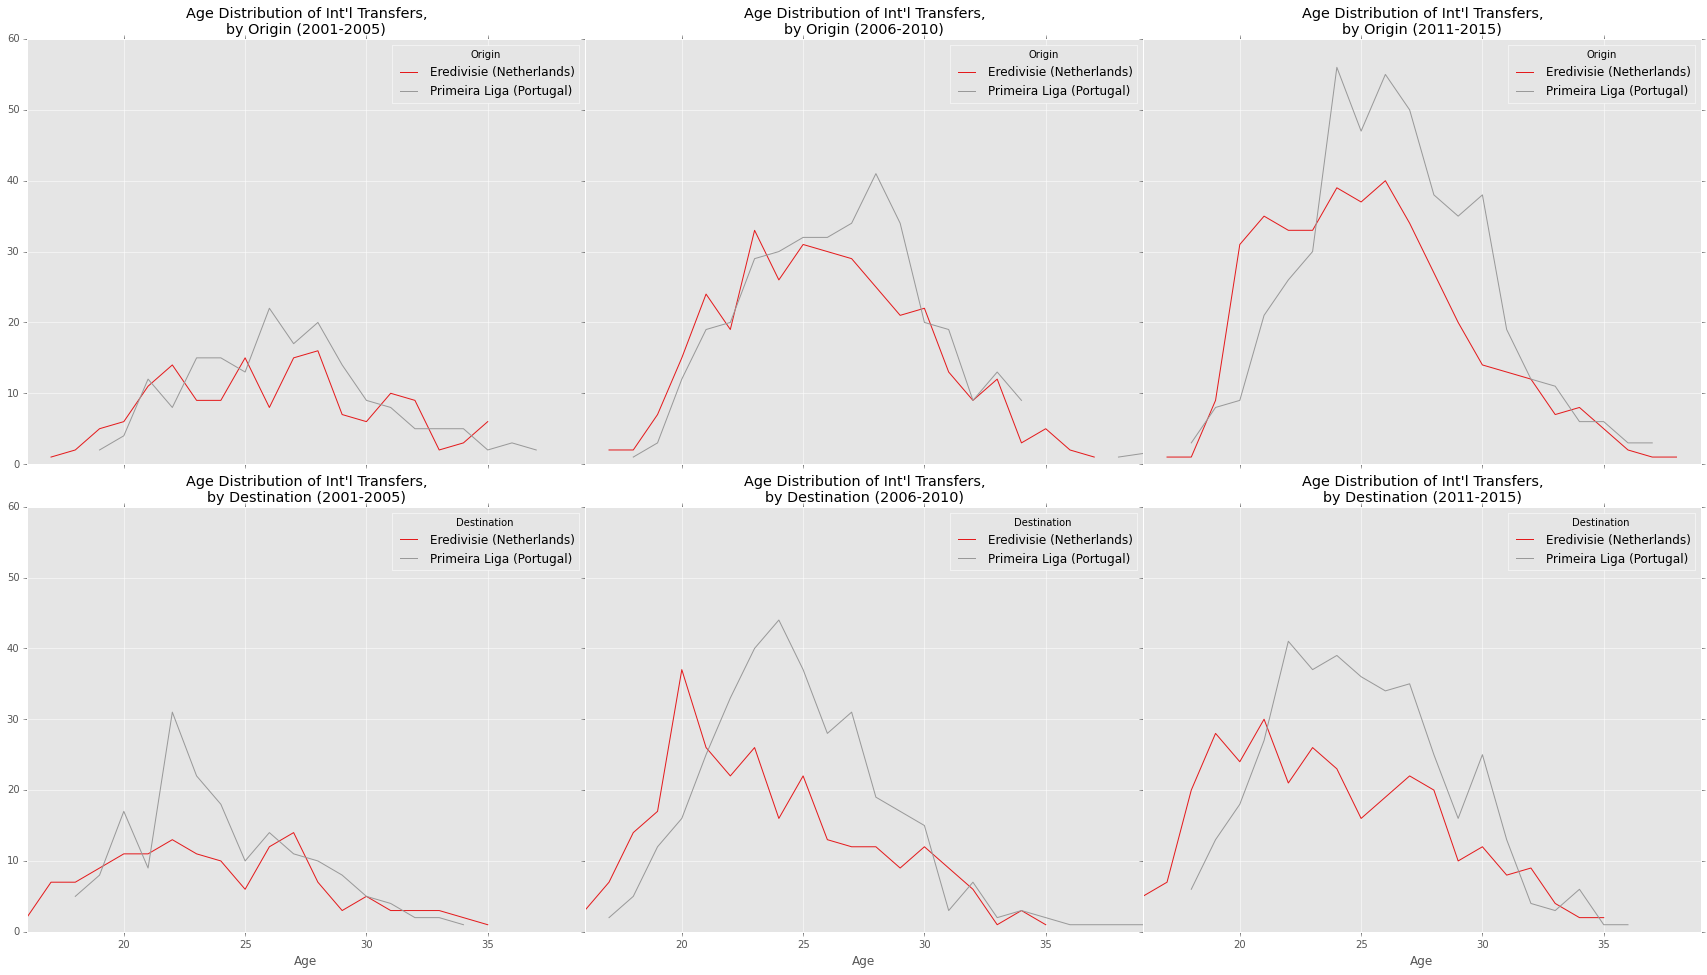

In [251]:
leagues=['NL1','PO1']

df1=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['fromLeague'].isin(leagues))] \
    .rename(columns={'fromLeague':'Origin'}).groupby(['Age','Origin','period'])['id'].count().unstack().unstack() \
    .rolling(window=1,center=False).mean().rename(columns=leagueCodeMapping)
    
df2=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['toLeague'].isin(leagues))] \
    .rename(columns={'toLeague':'Destination'}).groupby(['Age','Destination','period'])['id'].count().unstack().unstack() \
    .rolling(window=1,center=False).mean().rename(columns=leagueCodeMapping)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 16),sharex=True,sharey=True)

#df['(1995, 2000]'].plot(ax=axes[0,0], title="Age Distribution of Int'l Transfers, \nby Origin (1996-2000)", colormap='Set1', legend=False)
df1['(2000, 2005]'].plot(ax=axes[0,0], title="Age Distribution of Int'l Transfers, \nby Origin (2001-2005)", colormap='Set1', legend=True)
df1['(2005, 2010]'].plot(ax=axes[0,1], title="Age Distribution of Int'l Transfers, \nby Origin (2006-2010)", colormap='Set1', legend=True)
df1['(2010, 2015]'].plot(ax=axes[0,2], title="Age Distribution of Int'l Transfers, \nby Origin (2011-2015)", colormap='Set1', legend=True)
df2['(2000, 2005]'].plot(ax=axes[1,0], title="Age Distribution of Int'l Transfers, \nby Destination (2001-2005)", colormap='Set1', legend=True)
df2['(2005, 2010]'].plot(ax=axes[1,1], title="Age Distribution of Int'l Transfers, \nby Destination (2006-2010)", colormap='Set1', legend=True)
df2['(2010, 2015]'].plot(ax=axes[1,2], title="Age Distribution of Int'l Transfers, \nby Destination (2011-2015)", colormap='Set1', legend=True)

plt.subplots_adjust(wspace=0,hspace=.1)

fig.savefig('age_by_league.png')


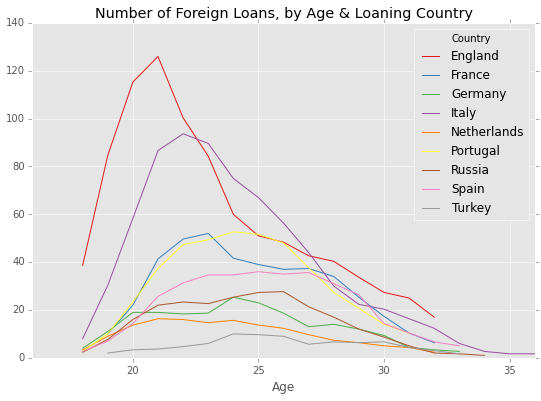

In [128]:
loans[(loans['fromCountry']!=loans['toCountry'])&(loans['fromCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['Age','Country'])['id'].count().unstack() \
    .rolling(window=3,center=False).mean().plot.line(figsize=(9,6),title='Number of Foreign Loans, by Age & Loaning Country',colormap='Set1')

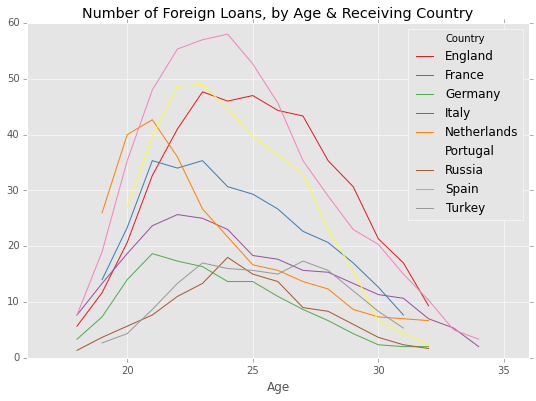

In [125]:
loans[(loans['fromCountry']!=loans['toCountry'])&(loans['toCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['Age','Country'])['id'].count().unstack() \
    .rolling(window=3,center=False).mean().plot.line(figsize=(9,6),title='Number of Foreign Loans, by Age & Receiving Country',colormap='Set1')

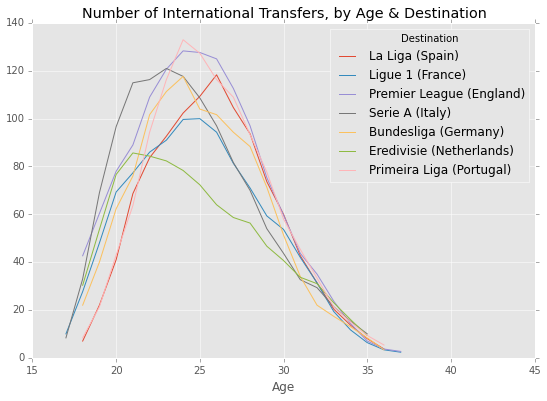

In [81]:
nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['toLeague'].isin(['GB1','ES1','L1','IT1','FR1','NL1','PO1']))] \
    .rename(columns={'toLeague':'Destination'}).groupby(['Age','Destination'])['id'].count().unstack() \
    .rolling(window=3,center=False).mean().rename(columns=leagueCodeMapping).plot.line(figsize=(9,6),xlim=(15,45),title='Number of International Transfers, by Age & Destination')

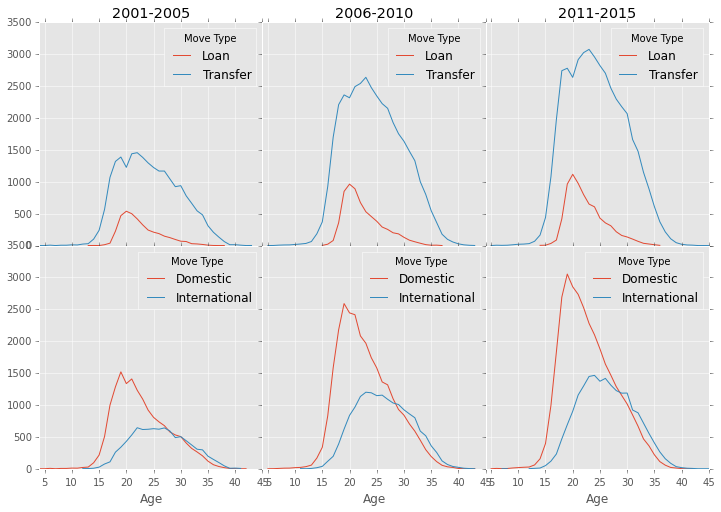

In [248]:
t=transfers

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8),sharex=True,sharey=True)

isLoan=t.join(pd.Series(np.where(t['isLoan'],'Loan','Transfer')).rename('Move Type')).groupby(['Age','Move Type','period'])['id'].count().unstack().unstack()


foreignVdomestic =t.join(pd.Series(np.where(t['fromCountry']==t['toCountry'],'Domestic','International')).rename('Move Type'))\
    .groupby(['Age','Move Type','period'])['id'].count().unstack().unstack()
    
isLoan['(2000, 2005]'].plot(ax=axes[0,0],title='2001-2005')
isLoan['(2005, 2010]'].plot(ax=axes[0,1],title='2006-2010')
isLoan['(2010, 2015]'].plot(ax=axes[0,2],title='2011-2015')

foreignVdomestic['(2000, 2005]'].plot(ax=axes[1,0])
foreignVdomestic['(2005, 2010]'].plot(ax=axes[1,1])
foreignVdomestic['(2010, 2015]'].plot(ax=axes[1,2])


plt.subplots_adjust(wspace=0,hspace=0)

fig.savefig('loan_intl.png')

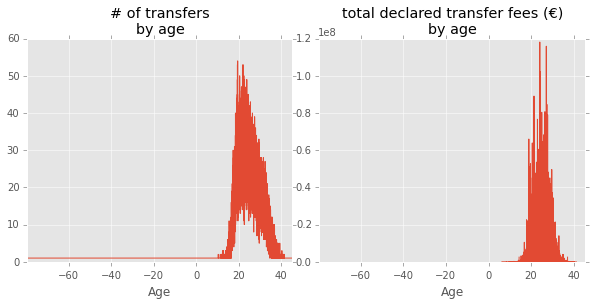

In [5]:
t=transfers[transfers['season'].between(2001,2015)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4),sharex=True,sharey=False)


t.groupby('Age')['id'].count().plot(ax=axes[0],title=u'# of transfers\nby age')
t.groupby('Age')['feeValue'].sum().plot(ax=axes[2], title=u'total declared transfer fees (€)\nby age')
t.groupby('Age')['mv'].sum().plot(ax=axes[1],title=u'total market value of transfers  (€)\nby age')


plt.subplots_adjust(wspace=.1,hspace=0)

fig.savefig('age_curves.png')

In [14]:
t[t['feeValue']>0].groupby('Age')

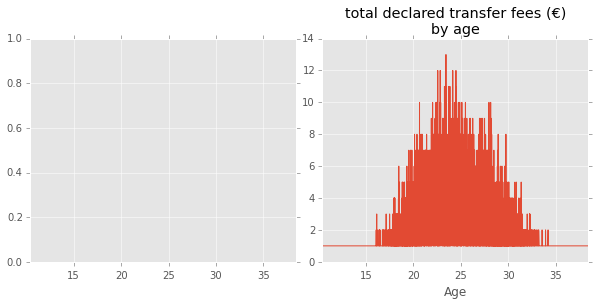

In [10]:
t=transfers[transfers['season'].between(2001,2015)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),sharex=True,sharey=False)


t[t['feeValue']==0].groupby('Age')['id'].count() #.plot(ax=axes[0],title=u'# of transfers\nby age')
t[t['feeValue']>0].groupby('Age')['id'].count() #.plot(ax=axes[1], title=u'total declared transfer fees (€)\nby age')


plt.subplots_adjust(wspace=.1,hspace=0)

fig.savefig('age_curves_paid_free.png')

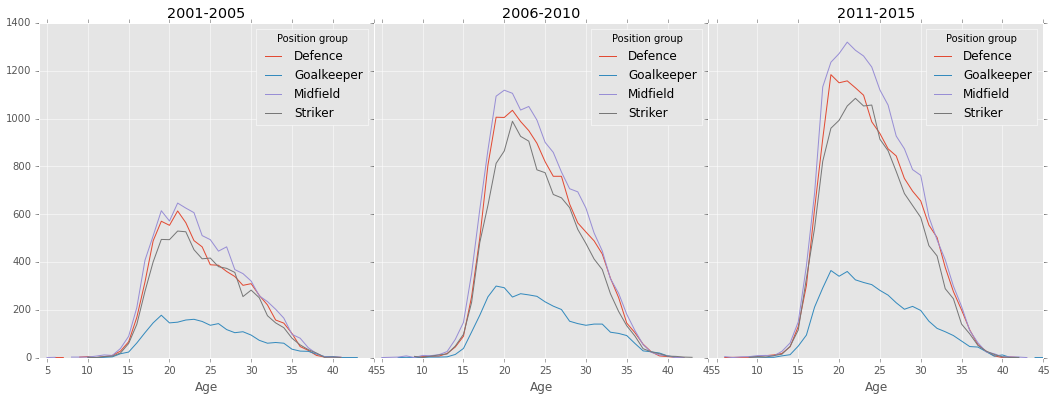

In [274]:
t=transfers

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6),sharex=True,sharey=True)

g=t.groupby(['Age','Position group','period'])['id'].count().unstack().unstack() #.plot(ax=axes)

g['(2000, 2005]'].plot(ax=axes[0],title='2001-2005')
g['(2005, 2010]'].plot(ax=axes[1],title='2006-2010')
g['(2010, 2015]'].plot(ax=axes[2],title='2011-2015')


plt.subplots_adjust(wspace=0,hspace=0)

fig.savefig('loan_intl.png')

In [238]:
isLoan

period,"(1995, 2000]","(2000, 2005]","(2005, 2010]","(2010, 2015]"
Move Type,Transfer,Transfer,Transfer,Transfer
Age,,,,
4.0,1.0,NaN,NaN,NaN
5.0,2.0,NaN,NaN,NaN
6.0,12.0,4.0,NaN,NaN
7.0,7.0,7.0,NaN,NaN
8.0,12.0,10.0,1.0,NaN
9.0,16.0,15.0,3.0,NaN
10.0,30.0,24.0,9.0,NaN
11.0,24.0,38.0,20.0,NaN


In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math
import matplotlib.pyplot as plt

transfers = pd.read_csv('../data/merged/transfers.csv')
transfers['period']=pd.cut(nonloans['season'],[1995,2000,2005,2010,2015])
loans=transfers[transfers['isLoan']]
nonloans=transfers[~transfers['isLoan']]
players=pd.read_csv('../data/merged/players.csv')

leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}

/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (32,40,45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NameError: name 'nonloans' is not defined